In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('Warsaw_rent_cleaned.csv')
df.head()

,squareMeters,rooms,floor,floorCount,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,type_numerical,month,price
0,47.0,2.0,8.0,9.0,52.257912,20.968610,3.76,33.0,1,1,1,0,0,0,11,5000
1,27.0,1.0,3.0,7.0,52.249800,21.035200,2.95,33.0,1,1,1,0,0,-1,11,2950
2,51.0,2.0,5.0,7.0,52.222864,21.009959,1.08,85.0,0,1,1,0,0,0,11,3700
3,50.0,3.0,3.0,5.0,52.224948,21.012136,0.95,124.0,0,0,1,0,0,1,11,5000
4,39.8,2.0,2.0,3.0,52.216513,21.041474,3.09,6.0,0,0,0,0,0,1,11,4500


<Axes: >

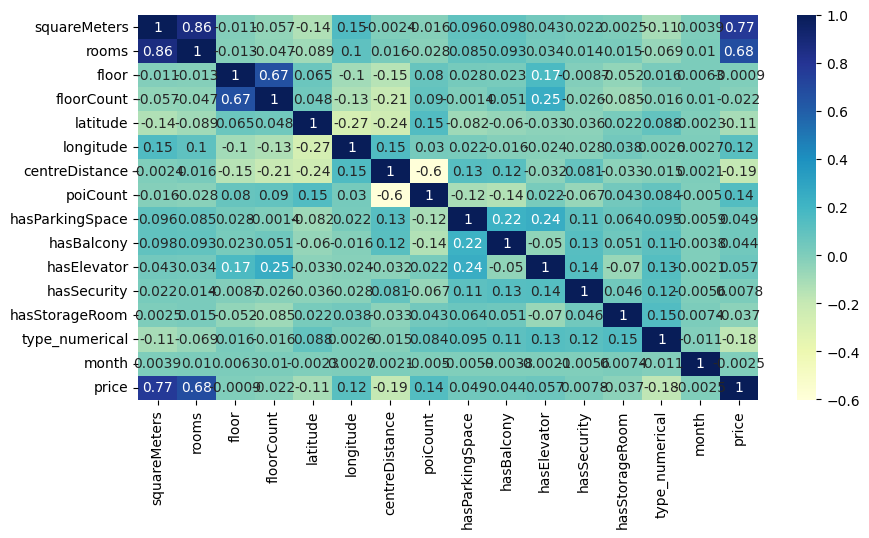

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [4]:
#usuwam zmienne zależne
df = df.drop(['rooms','poiCount'],axis=1)

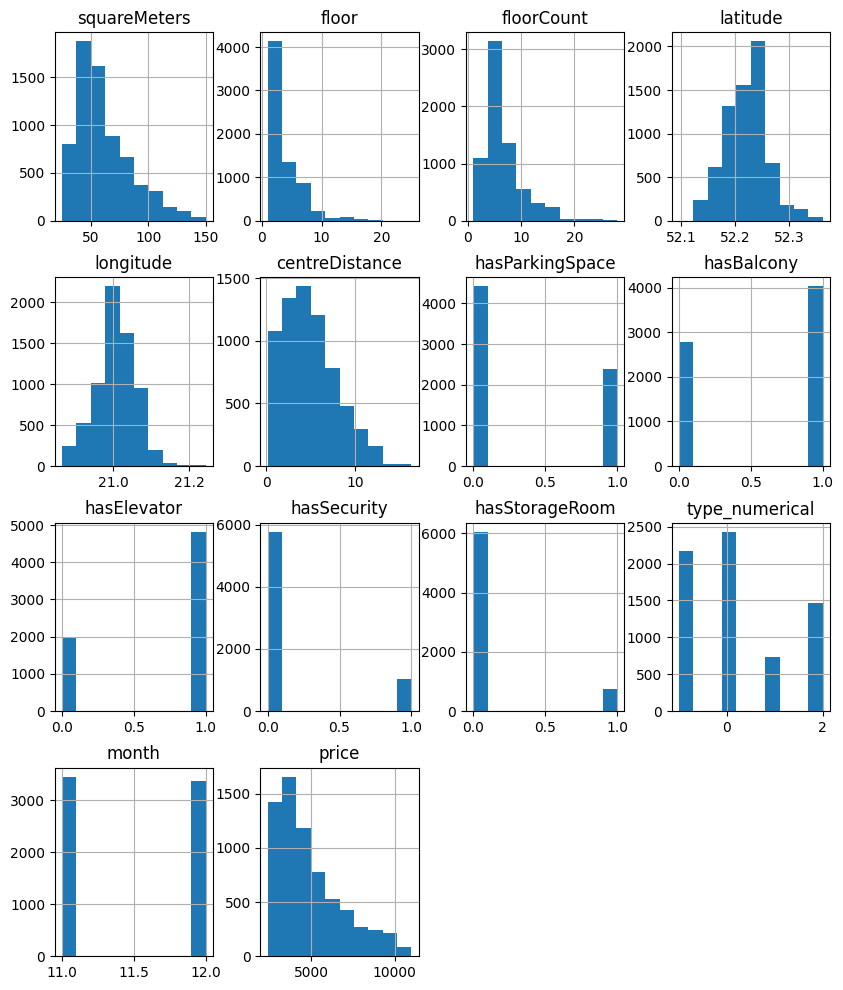

In [5]:
df.hist(figsize=(10,12))
plt.show()

In [6]:
df.columns

Index(['squareMeters', 'floor', 'floorCount', 'latitude', 'longitude',
       'centreDistance', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'type_numerical', 'month', 'price'],
      dtype='object')

array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floorCount'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'centreDistance'}>,
        <Axes: title={'center': 'hasParkingSpace'}>,
        <Axes: title={'center': 'hasBalcony'}>],
       [<Axes: title={'center': 'hasElevator'}>,
        <Axes: title={'center': 'hasSecurity'}>,
        <Axes: title={'center': 'hasStorageRoom'}>,
        <Axes: title={'center': 'type_numerical'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

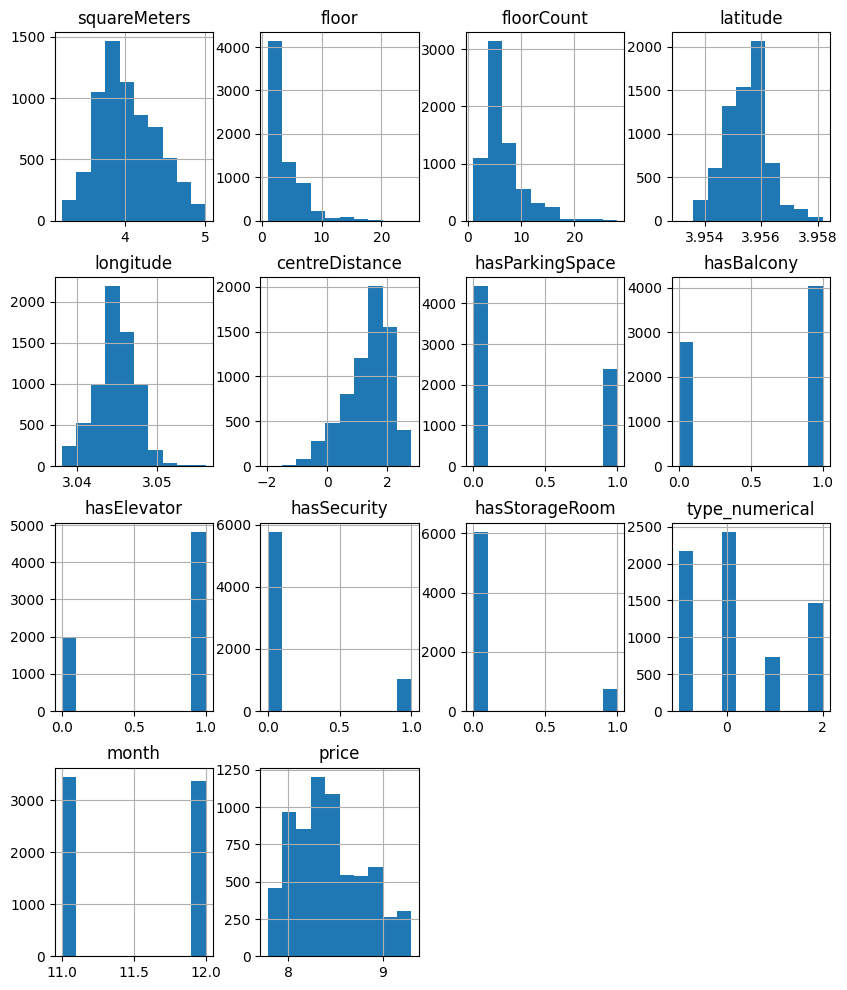

In [7]:
kolumny_do_logarytmu = ['squareMeters', 'latitude', 'longitude', 'centreDistance', 'price']

df[kolumny_do_logarytmu] = df[kolumny_do_logarytmu].apply(np.log)

df.hist(figsize=(10,12))

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
print(lm.intercept_)

125.40353338946952


In [11]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
squareMeters,0.757122
floor,-0.000688
floorCount,-0.002251
latitude,-31.397971
longitude,1.450821
centreDistance,-0.125099
hasParkingSpace,0.002634
hasBalcony,0.016671
hasElevator,0.024112
hasSecurity,0.015244


#### predictions

In [12]:
predictions=lm.predict(X_test)

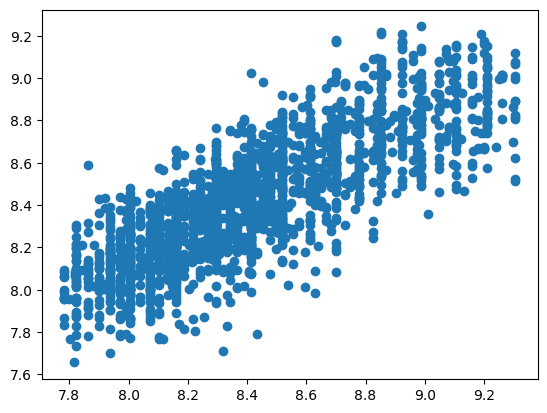

In [13]:
plt.scatter(y_test,predictions)

<Axes: xlabel='price', ylabel='Count'>

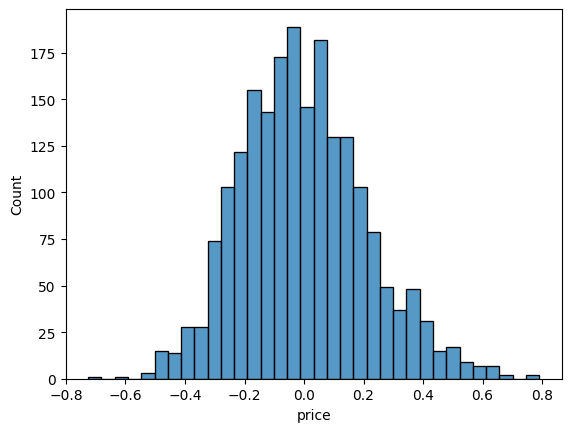

In [14]:
sns.histplot(y_test-predictions)

In [15]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE 0.1685865888424893
MSE 0.04480063324652025
RMSE 0.41059297222734986


In [16]:
metrics.explained_variance_score(y_test, predictions)

0.6628522782410465